# imports

In [1]:
from notebooks_tools import *
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
MCBNB_gen = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/g4_features_MC_BNB_AnalysisTrees.csv')
MCBNB_gen_protons = MCBNB_gen[(MCBNB_gen.pdg==2212) & (MCBNB_gen.primary==1)]
MCBNB_gen_nonprotons = MCBNB_gen[MCBNB_gen.pdg!=2212]
MCBNB_rec = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MC_BNB_AnalysisTrees.csv')
MCBNB_rec_protons = MCBNB_rec[(MCBNB_rec.MCpdgCode==2212)  & (MCBNB_rec.process_primary==1)]
MCBNB_rec_nonprotons = MCBNB_rec[MCBNB_rec.MCpdgCode!=2212]

# load MC tracks

In [4]:
MCBNB_rec.residual_range_Y

0         ['30.842', '30.602', '30.323', '30.012', '29.6...
1                                                 ['0.987']
2         ['130.228', '129.910', '129.610', '129.309', '...
3         ['10.050', '9.626', '8.404', '8.268', '8.052',...
4         ['0.622', '1.231', '1.725', '2.121', '2.499', ...
5         ['0.429', '0.807', '1.300', '1.817', '2.319', ...
6         ['0.570', '0.935', '1.282', '1.664', '2.039', ...
7         ['0.492', '0.812', '1.221', '1.575', '1.884', ...
8         ['0.675', '1.113', '1.499', '1.866', '2.203', ...
9         ['110.593', '110.261', '109.882', '109.431', '...
10                                                ['0.727']
11        ['0.389', '0.649', '0.902', '1.180', '1.497', ...
12        ['0.703', '1.253', '1.867', '2.661', '3.455', ...
13        ['0.482', '0.799', '1.111', '1.421', '1.734', ...
14        ['0.500', '0.889', '1.263', '1.627', '1.986', ...
15        ['10.132', '9.722', '9.386', '9.083', '8.782',...
16        ['0.295', '0.497', '0.737', '1

In [15]:
print 'generated events:',len(MCBNB_gen.groupby(['run','subrun','event'])) 
print 'generated contained tracks:',len(MCBNB_gen)
print 'generated contained primary protons:',len(MCBNB_gen_protons) 
print 'generated contained primary protons with track > 1.5 cm:',len(MCBNB_gen_protons[MCBNB_gen_protons.length>1.5]) 


print 'reconstructed events with at least one contained track:',len(MCBNB_rec.groupby(['run','subrun','event'])) 
print 'reconstructed contained tracks:',len(MCBNB_rec)
print 'reconstructed contained primary protons:',len(MCBNB_rec_protons)
print 'reconstructed contained primary protons with track > 1.5 cm:',len(MCBNB_rec_protons[MCBNB_rec_protons.length>1.5]) 



generated events: 345748
generated contained tracks: 2627720
generated contained primary protons: 369804
generated contained primary protons with track > 1.5 cm: 215931
reconstructed events with at least one contained track: 206358
reconstructed contained tracks: 387789
reconstructed contained primary protons: 134019
reconstructed contained primary protons with track > 1.5 cm: 127032


In [5]:
plt.hist()

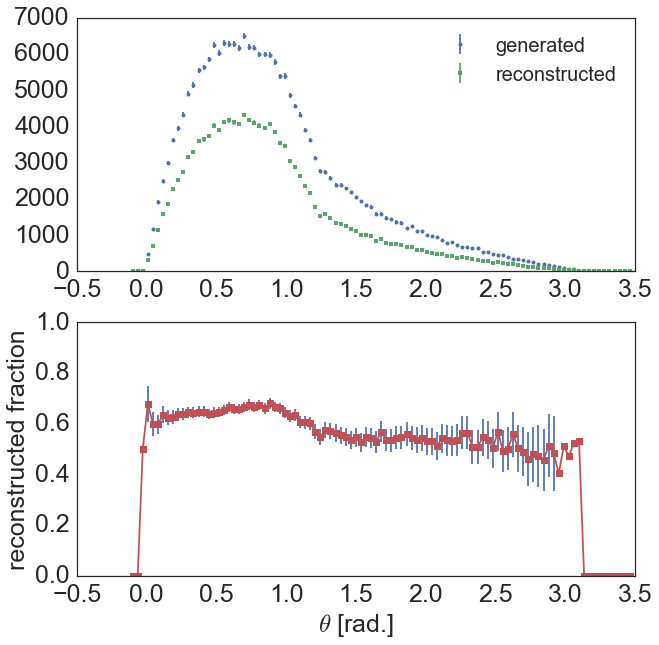

In [19]:
uB_acceptace_1d( var='theta', x_label='$\\theta$ [rad.]', bins=np.linspace(-0.1,3.5,100),legend_loc='upper right' );

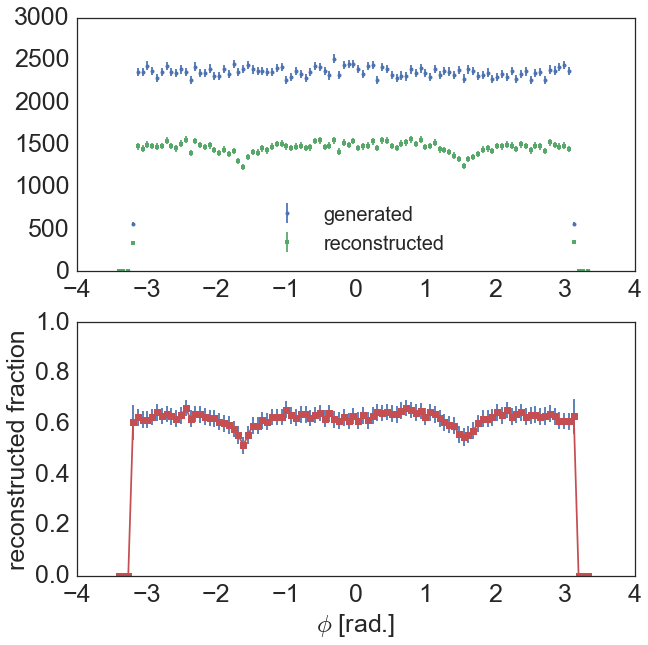

In [22]:
uB_acceptace_1d( var='phi', x_label='$\\phi$ [rad.]', bins=np.linspace(-3.4,3.4,100),legend_loc='lower center' );

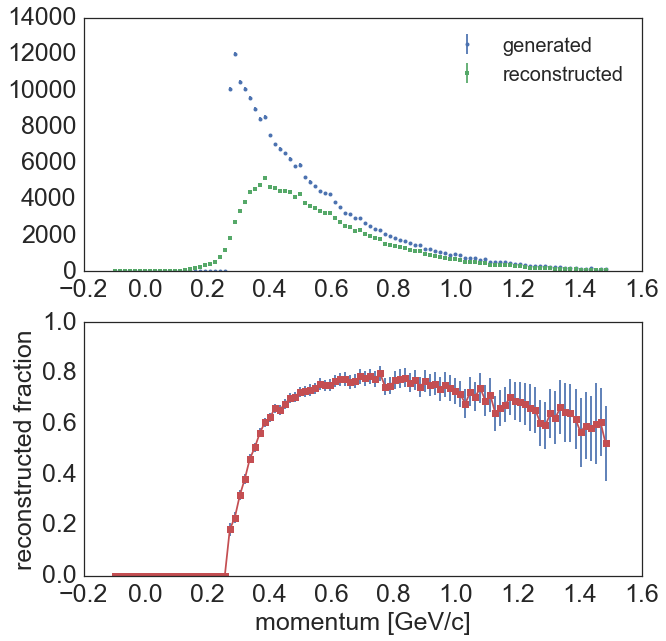

In [16]:
uB_acceptace_1d( var='P', x_label='momentum [GeV/c]', bins=np.linspace(-0.1,1.5,100),legend_loc='upper right' );

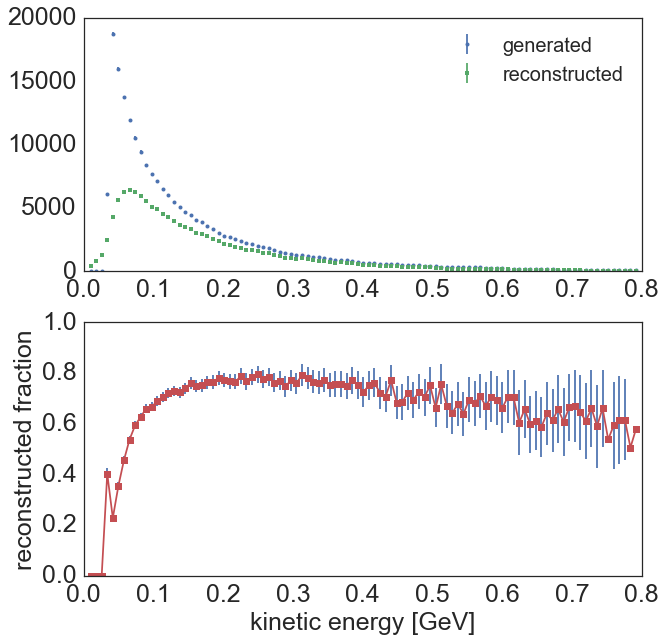

In [18]:
uB_acceptace_1d( var='KE', x_label='kinetic energy [GeV]', bins=np.linspace(0.01,0.8,100),legend_loc='upper right',y_lim=(0,1) );

In [39]:
def acceptace_2d( vx='theta' , vy='phi', 
                 x_label='$\\theta$ [rad.]',y_label='$\\phi$ [rad.]',
                 binsx=np.linspace(0,3.4,30) , binsy=np.linspace(-3.4,3.4,30),
                 figsize=(14,7),fontsize=20,
                 legend_loc='lower left',
                 norm=LogNorm(),
                 do_print=False,
                aspect_ratio=0.3):
    
    x = [binsx[i] for i in range(len(binsx)-1)]
    y = [binsy[i] for i in range(len(binsy)-1)]

    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(131)
    h_gen,xedges,yedges = np.histogram2d(MCBNB_gen_protons[vx],MCBNB_gen_protons[vy],bins=[binsx,binsy])
    h_rec,xedges,yedges = np.histogram2d(MCBNB_rec_protons['truth_'+vx],MCBNB_rec_protons['truth_'+vy],bins=[binsx,binsy])
    plt.scatter(MCBNB_gen_protons[vx],MCBNB_gen_protons[vy],s=7,color='black',label='generated')
    plt.scatter(MCBNB_rec_protons['truth_'+vx],MCBNB_rec_protons['truth_'+vy],s=4,color='green',label='reconstructed')
    ax = fig.add_subplot(132)
    plt.hist2d(MCBNB_gen_protons[vx],MCBNB_gen_protons[vy],bins=[binsx,binsy],cmap='gray_r')
    ax.set_title('generated')
    plt.colorbar()
    ax = fig.add_subplot(133)
    plt.hist2d(MCBNB_rec_protons['truth_'+vx],MCBNB_rec_protons['truth_'+vy],bins=[binsx,binsy],cmap='Greens')
    ax.set_title('reconstructed')
    plt.colorbar()
    
    fig,ax = plt.subplots(figsize=figsize)
    acceptance = np.zeros([len(binsx)-1,len(binsy)-1])
    for i in range(len(binsx)-1):
        for j in range(len(binsy)-1):
            if h_gen[i][j]>0 and h_gen[i][j]>h_rec[i][j]:
                acceptance[i][j] = float(h_rec[i][j])/h_gen[i][j]            
            elif h_rec[i][j]>h_gen[i][j]:
                acceptance[i][j] = 1
            elif h_gen[i][j]==0: 
                acceptance[i][j] = 0

    X, Y = np.meshgrid(xedges, yedges)
    if do_print:
        print 'h_gen:\n',h_gen
        print 'h_rec:\n',h_rec
        print 'acceptance:\n',acceptance
#     quadmesh = ax.pcolormesh(X, Y, acceptance,cmap='hot_r')#,norm=norm)
#     quadmesh = ax.imshow(acceptance)
    extent = [np.min(binsx),np.max(binsx),np.min(binsy),np.max(binsy)]
    im = ax.imshow(acceptance.T,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
    im = ax.imshow(np.ma.masked_where(acceptance == 0, acceptance).T, cmap='hot_r', interpolation='none', 
                   origin='lower', extent=extent)
    cb = plt.colorbar(im)
    ax.set_aspect(aspect_ratio)
#     cb = plt.colorbar(quadmesh) 
    for l in cb.ax.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    ax.set_xlim(np.min(binsx),np.max(binsx))
    ax.set_ylim(np.min(binsy),np.max(binsy))
    set_axes(ax,x_label,y_label)
    return ax , X , Y , acceptance

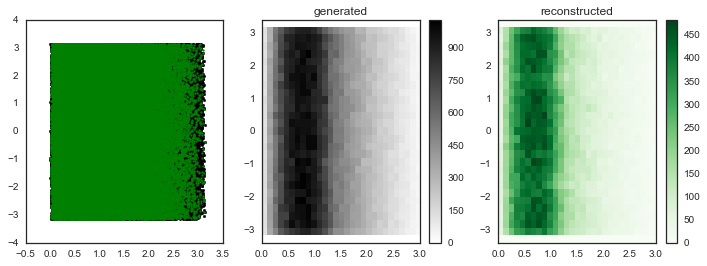

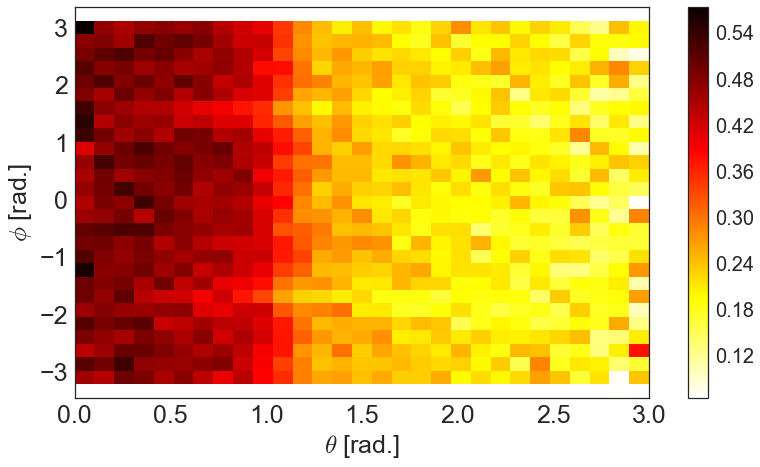

In [36]:
ax , X , Y , acceptance = acceptace_2d( vx='theta' , vy='phi',binsx=np.linspace(0,3.,30) , binsy=np.linspace(-3.4,3.4,30), 
                                  do_print=False,
                                  norm=None);

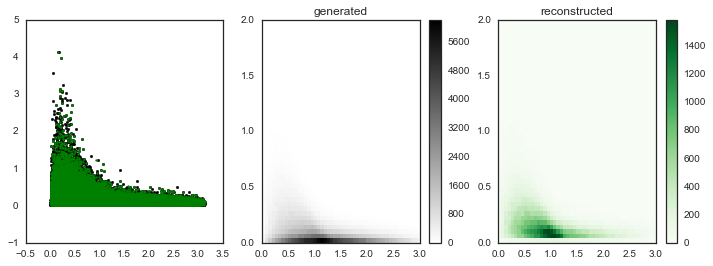

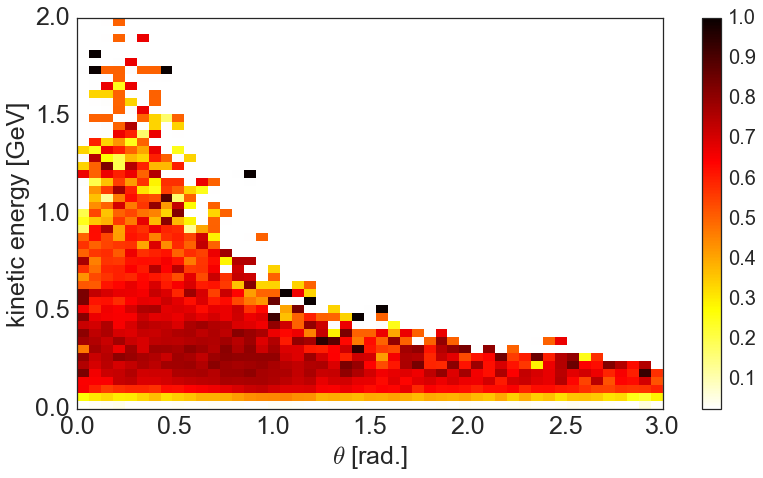

In [42]:
ax , X , Y , acceptance = acceptace_2d( vx='theta' , vy='KE',binsx=np.linspace(0,3.,50) , binsy=np.linspace(0,2.,50) ,y_label='kinetic energy [GeV]' ,aspect_ratio=1)

In [16]:
bins = np.linspace(0,50,50)
plt.hist(data_protons.pidpida[data_protons.pidpida<100],bins=bins,color='blue',histtype='step',label='MC protons')
plt.hist(data_nonprotons.pidpida[data_nonprotons.pidpida<100],bins=bins,color='green',histtype='step',label='MC non protons')
plt.legend()

NameError: name 'data_protons' is not defined

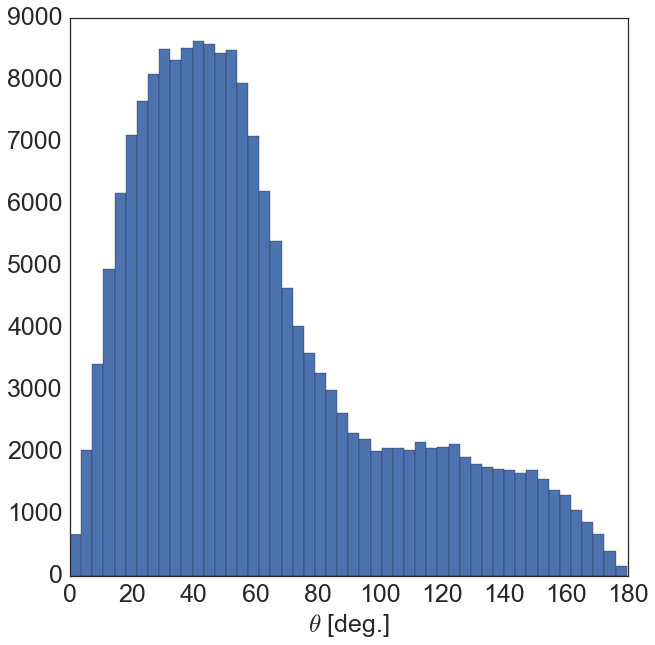

In [10]:
pt.plot_1d_hist(180/3.1415*data_protons.theta,bins=50,histtype='bar',xlabel='$\\theta$ [deg.]')

In [ ]:
pt.plot_2d_hist(180/3.1415*data_protons.theta,data_protons.Ev_truth,xlabel='$\\theta$ [deg.]',ylabel='truth $\\E_{\\nu}$ [MeV]')

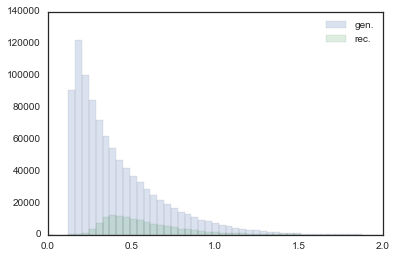

In [5]:
plt.hist(MCBNB_gen_protons.P,bins=np.linspace(0,2,50),alpha=0.2,label='gen.');
plt.hist(MCBNB_rec_protons.truth_P,bins=np.linspace(0,2,50),alpha=0.2,label='rec.');
plt.legend()